In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

cm = plt.get_cmap('viridis')

def sigmoid(x):
    return 1./(1.+np.exp(-x))

def make_vector(n=4,com=[0.0,0.0]):
    l = float(n)
    l0 = com[0] - 0.5*l #+ 0.5
    elements = [Rectangle((-0.5,l0+float(i)),1.,1.) for i in range(n)]
    return elements

def make_matrix(n=4,m=4,com=[0.0,0.0]):
    ln = float(n)
    lm = float(m)
    ln0 = com[1] + 0.5*ln
    lm0 = com[0] - 0.5*lm
    elements = [Rectangle((lm0+float(j),ln0-float(i)),1.,1.) for j in range(m) for i in range(n)]
    indices = [[i,j] for j in range(m) for i in range(n)]
    return elements,indices

def make_layer(nnodes,com=[0.0,0.0]):
    y_0 = com[1] - nnodes/2
    x_0 = com[0]
    pos = [(x_0,y_0+i) for i in range(nnodes)]
    elements = [Circle((x_0,y_0+i),radius=0.3,zorder=2) for i in range(nnodes)]
    return elements, pos

def plot_mlp(layers=[4,8,8,1],weight_tensors=[],input_tensor=[],figsize=None,filename=None,softmax=False):
    if figsize == None:
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    else:
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'},figsize=figsize)
    dx = min(10.,max(max(layers)/10.0,1.0))
    print(dx)
    ly = max(layers)
    lx = len(layers)*1.5*dx
    nlayers = len(layers)-1
    if len(input_tensor) == 0:
        hidden_states = [np.random.random(layers[0])-0.5] 
    else: 
        hidden_states = input_tensor
    if len(weight_tensors) == 0:
        weights = []
        #hidden_states = [np.random.random(layers[0])-0.5]
        for i in range(nlayers):
            wm = np.random.random((layers[i],layers[i+1]))-0.5
            weights.append(wm)
            if i < (nlayers-1):
                h = sigmoid(np.matmul(hidden_states[i],wm))
            else:
                h = (np.matmul(hidden_states[i],wm))
                if softmax:
                    h = np.exp(h)
                    h /= np.sum(h)
            hidden_states.append(h)
            #print(h)
    else:
        weights = weight_tensors
        for i in range(nlayers):
            wm = weight_tensors[i]
            #weights.append(wm)
            if i < (nlayers-1):
                h = sigmoid(np.matmul(hidden_states[i],wm))
            else:
                h = (np.matmul(hidden_states[i],wm))
                if softmax:
                    h = np.exp(h)
                    h /= np.sum(h)
            hidden_states.append(h)
            #print(h)

    print(hidden_states[0],hidden_states[-1])
    node_elements = []
    node_positions = []
    for i,nnodes in enumerate(layers):
        elements,pos = make_layer(nnodes,com=[i*1.5*dx,0.0])
        node_elements.append(elements)
        node_positions.append(pos)
        
    for i,nnodes in enumerate(layers):
        if i<nlayers:
            for i1,p1 in enumerate(node_positions[i]):
                for i2,p2 in enumerate(node_positions[i+1]):
                    plt.plot([p1[0],p2[0]],[p1[1],p2[1]],c=cm(weights[i][i1,i2]+0.5),alpha=0.5)
        for j,e in enumerate(node_elements[i]):
            ax.add_artist(e)
            e.set_clip_box(ax.bbox)
            e.set_alpha(1.0)
            e.set_edgecolor('k')
            e.set_facecolor(cm(hidden_states[i][j]+0.5))
            
    ax.set_xlim(-0.2*lx,1.2*lx)
    ax.set_ylim(-0.8*ly,0.8*ly)
    ax.axis("off")
    if filename==None:
        plt.show()
    else:
        plt.savefig(filename,bbox_inches='tight')
        plt.show()
        

def plot_tensors(objects=[np.random.random((4,4,3))],figsize=None,filename=None):
    if figsize == None:
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    else:
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'},figsize=figsize)
    coms = []
    lx   = 0.0
    ly   = 0.0
    for obj in objects:
        if len(obj.shape) == 3:
            n,m, o = obj.shape
        elif len(obj.shape) == 2:
            n = obj.shape[0]
            m = obj.shape[1]
            o = 1
            obj = obj.reshape((n,m,o))
        elif len(obj.shape) == 1:
            n = obj.shape[0]
            m = 1
            o = 1
            obj = obj.reshape((n,m,o))
        obj += np.min(obj) #.min()
        obj = (1./np.max(obj))*obj 
        com_x = lx + 0.5*float(m)
        lx += float(m)+2.0
        ly = max([ly,float(n)])
        for io in range(o):
            elements,indices = make_matrix(n,m,[com_x+0.4*io,0.0+0.4*io])
            for i,e in enumerate(elements):
                ax.add_artist(e)
                e.set_clip_box(ax.bbox)
                e.set_alpha(1.0)
                e.set_edgecolor('k')
                e.set_facecolor(cm(float(obj[indices[i][0],indices[i][1],io])))
    lx += 2.
    lfig = max(lx,ly)
    ax.set_xlim(-0.2*lx,1.2*lx)
    ax.set_ylim(-1.2*ly,1.2*ly)
    ax.axis("off")
    if filename==None:
        plt.show()
    else:
        plt.savefig(filename,bbox_inches='tight')
        plt.show()
        
def plot_objects(objects=[np.random.random((4,4))],figsize=None,filename=None):
    if figsize == None:
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    else:
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'},figsize=figsize)
    coms = []
    lx   = 0.0
    ly   = 0.0
    for obj in objects:
        if len(obj.shape) == 2:
            n,m = obj.shape
        elif len(obj.shape) == 1:
            n = obj.shape[0]
            m = 1
            obj = obj.reshape((n,m))
        obj += np.min(obj) #.min()
        obj = (1./np.max(obj))*obj 
        com_x = lx + 0.5*float(m)
        lx += float(m)+2.0
        ly = max([ly,float(n)])
        elements,indices = make_matrix(n,m,[com_x,0.0])
        for i,e in enumerate(elements):
            ax.add_artist(e)
            e.set_clip_box(ax.bbox)
            e.set_alpha(0.5)
            e.set_edgecolor('k')
            e.set_facecolor(cm(float(obj[indices[i][0],indices[i][1]])))
    lx += 2.
    lfig = max(lx,ly)
    ax.set_xlim(-0.2*lx,1.2*lx)
    ax.set_ylim(-0.7*ly,0.7*ly)
    ax.axis("off")
    if filename==None:
        plt.show()
    else:
        plt.savefig(filename,bbox_inches='tight')
        plt.show()

"""
def plot_objects_old(objects=[(4,1),(4,16)]):
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    coms = []
    lx   = 0.0
    ly   = 0.0
    for obj in objects:
        n,m = obj
        com_x = lx + 0.5*float(m)
        lx += float(m)+2.0
        ly = max([ly,float(n)])
        elements = make_matrix(n,m,[com_x,0.0])
        for e in elements:
            ax.add_artist(e)
            e.set_clip_box(ax.bbox)
            e.set_alpha(0.5)
            e.set_edgecolor('k')
            #e.set_facecolor(np.random.rand(3))
    lx += 2.
    lfig = max(lx,ly)
    ax.set_xlim(-0.2*lfig,1.2*lfig)
    ax.set_ylim(-0.7*lfig,0.7*lfig)
    ax.axis("off")
    plt.show()
"""

def plot_vector(n=4,com=[0.0,0.0]):
    l = float(n)
    lfig = 1.2*l
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    elements = make_vector(n=n,com=com)
    for e in elements:
        ax.add_artist(e)
        e.set_clip_box(ax.bbox)
        e.set_alpha(0.5)
        e.set_edgecolor('k')
        #e.set_facecolor(np.random.rand(3))

    ax.set_ylim(-0.5*lfig, 0.5*lfig)
    ax.set_xlim(-0.5*lfig, 0.5*lfig)
    plt.show()

def plot_matrix(n=4,m=4,com=[0.0,0.0]):
    ln = float(n)
    lm = float(m)
    l = 1.2*max(ln,lm)
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    elements = make_matrix(n=n,m=m,com=com)
    for e in elements:
        ax.add_artist(e)
        e.set_clip_box(ax.bbox)
        e.set_alpha(0.5)
        e.set_edgecolor('k')
        #e.set_facecolor(np.random.rand(3))
    ax.set_ylim(-0.5*l, 0.5*l)
    ax.set_xlim(-0.5*l, 0.5*l)
    plt.show()



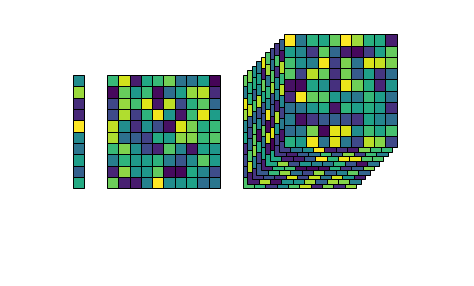

In [3]:
plot_tensors(objects=[np.random.random(10),np.random.random((10,10)),np.random.random((10,10,10))],figsize=(10,5),filename='tensors.png')

1.0
[-0.48124312  0.07987556  0.01223358 -0.3173308 ] [-0.02594778]


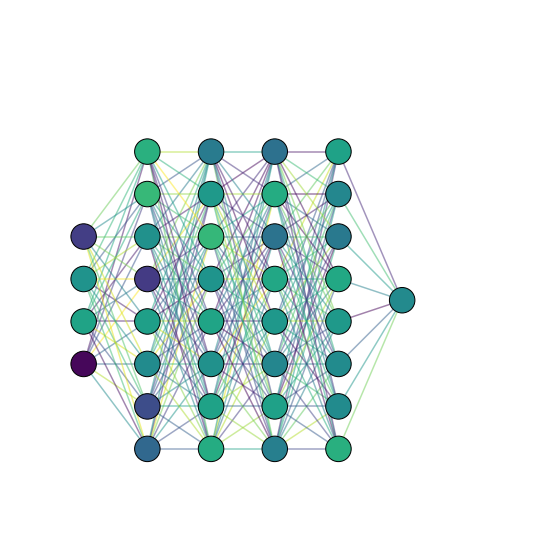

In [4]:
plot_mlp(layers=[4,8,8,8,8,1],figsize=(10,10),filename='simple_mlp.png')

1.0
[-0.48164458 -0.06490807  0.1410862  -0.22220018] [0.05768153]


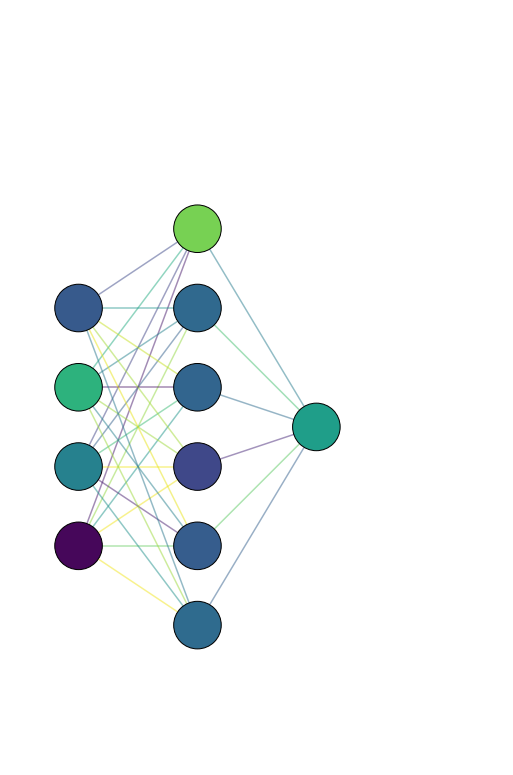

In [5]:
plot_mlp(layers=[4,6,1],figsize=(14,14),filename='simple_mlp_backprop.png')

6.4
[-0.04844246 -0.19623705 -0.22946012 -0.35488896  0.20847996  0.08415774
  0.02868219 -0.39350675  0.13835114  0.02221014  0.47751855 -0.48016376
 -0.43323432  0.24194329  0.19547941  0.08793493  0.15409551  0.0958619
 -0.12368    -0.09688296 -0.10133761  0.0384143   0.01506487  0.0607638
 -0.47137661 -0.33508025 -0.29683182 -0.32487349 -0.13767172  0.37823894
  0.32270483 -0.25861129  0.14169686 -0.28306423 -0.21780015  0.46584941] [0.38375864]


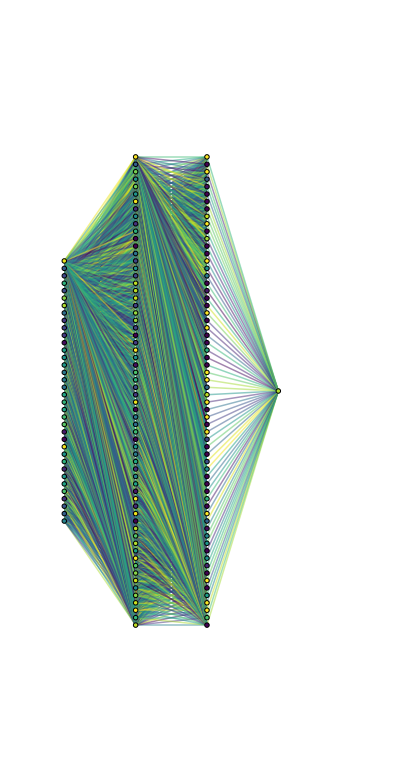

In [6]:
plot_mlp(layers=[36,64,64,1],figsize=(14,14),filename='tinyfold_mlp')

In [7]:
36*64+64*64+64*1+64+64

6592

1.0
[-0.09500744  0.30812061  0.24021977 -0.46951685] [0.62460893 0.51463325 0.09010393]


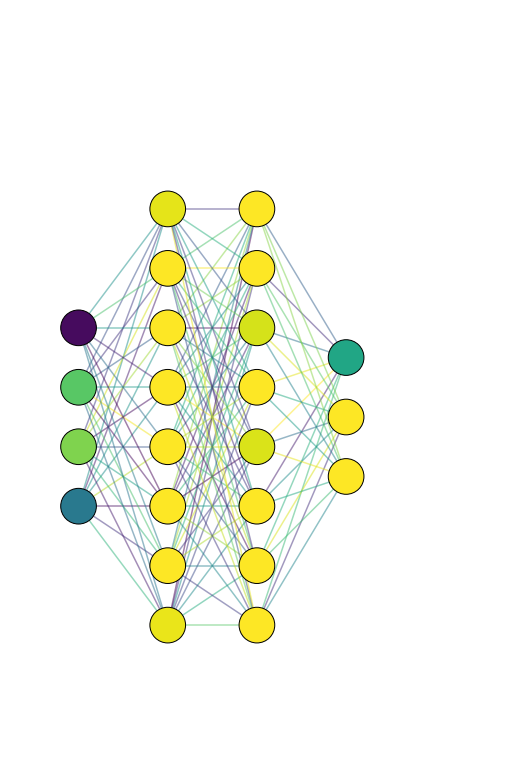

In [24]:
plot_mlp(layers=[4,8,8,3],figsize=(14,14),filename='simple_mlp_class.png')

In [15]:
w1 = np.array([[-0.1009, -1.0774,  1.2342,  0.7274],
        [-0.3335, -0.3729,  0.1612, -0.2220],
        [-0.4737, -1.2854,  1.0667,  1.2156],
        [ 0.5366,  0.3075,  0.2514,  0.0563],
        [ 0.2973,  0.5525, -0.7477, -0.5969],
        [-0.8349, -0.2249,  1.0374,  1.0274],
        [ 0.6713,  0.9673, -1.1505, -1.0221],
        [ 1.0097,  1.2464, -1.5759, -1.3365]]).T
w2 = np.array([[ 1.1209, -0.2504,  1.4306, -0.1424, -0.8774,  1.0193, -1.0367, -1.1012],
        [-0.9338, -0.3035, -0.7524, -0.0308,  0.2110, -0.3914,  1.1374,  1.4993],
        [-0.5971, -0.3039, -0.8982,  0.1666,  0.7635, -0.6994,  0.4282,  1.1786],
        [ 1.9834,  0.3096,  1.6695,  0.2383, -0.7626,  1.2219, -0.6681, -1.1668],
        [ 0.6291,  0.0090,  0.6529,  0.3016, -0.3088,  0.2626, -0.4803, -0.2400],
        [ 0.2621, -0.0769,  0.8214,  0.0296,  0.0116,  0.2017, -0.7108, -0.5249],
        [-1.1277,  0.3129, -1.4036,  0.0320,  0.5424, -0.7212,  0.9702,  1.7447],
        [-0.6927,  0.3747, -1.5479,  0.6612,  0.7999, -1.1457,  1.6856,  1.9790]]).T
w3 = np.array([[-2.9399,  1.5180,  1.0258, -3.2026, -0.8403, -0.7058,  2.6037,  1.7271],
        [-0.0624,  0.5108,  0.0333,  1.3704,  0.4513,  0.0274, -0.1024,  1.5171],
        [ 2.6519, -1.7463, -1.7959,  2.7458,  0.8270,  1.0293, -2.7766, -2.9750]]).T

In [21]:
X0 = np.array([6.1000, 2.8000, 4.7000, 1.2000])

plot_mlp(layers=[4,8,8,3],figsize=(14,14),filename='simple_mlp_class_x0.png',weight_tensors=[w1,w2,w3],input_tensor=[X0],softmax=True)

1.0
[6.1 2.8 4.7 1.2] [0.00580551 0.92914255 0.06505194]


1.0
[5.7 3.8 1.7 0.3] [9.66794285e-01 3.32044175e-02 1.29713611e-06]


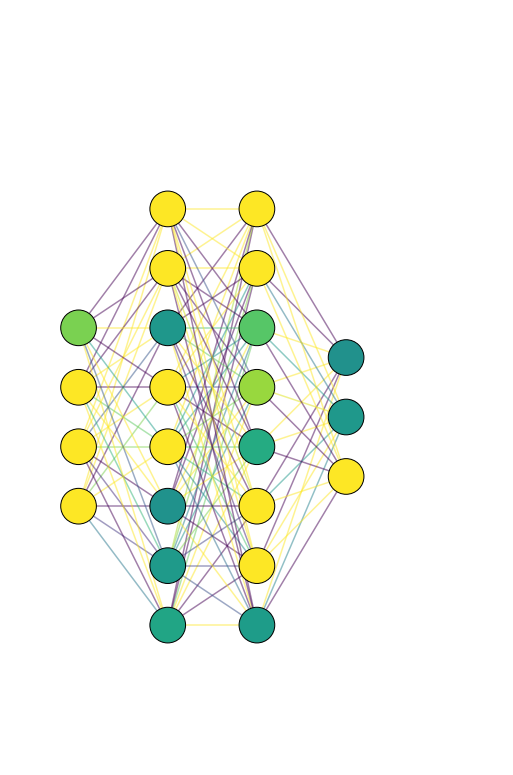

In [22]:
X1 = np.array([5.7000, 3.8000, 1.7000, 0.3000])

plot_mlp(layers=[4,8,8,3],figsize=(14,14),filename='simple_mlp_class_x1.png',weight_tensors=[w1,w2,w3],input_tensor=[X1],softmax=True)

In [23]:
#[7.7000, 2.6000, 6.9000, 2.3000]
X2 = np.array([7.7000, 2.6000, 6.9000, 2.3000])

plot_mlp(layers=[4,8,8,3],figsize=(14,14),filename='simple_mlp_class_x2.png',weight_tensors=[w1,w2,w3],input_tensor=[X2],softmax=True)

1.0
[7.7 2.6 6.9 2.3] [3.76388976e-06 1.88892810e-02 9.81106955e-01]
